In [ ]:
!pip install kneed


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from kneed import KneeLocator


import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path="/content/drive/MyDrive/Colab Notebooks/obesity.csv"
df=pd.read_csv(data_path)
df

NameError: name 'pd' is not defined

# Utility Function

In [ ]:
# Prints a dataframe's value counts for all features
def print_counts(df: pd.DataFrame):
    for i in df.columns:
        print(df[i].value_counts())
        print(30*"-")

def normalize_data():
    pass


# Inspecting DataFrame structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [ ]:
df.head(10)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [ ]:
df.tail(10)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
2101,0,25.722004,1,1,3.0,3.0,1,0,2.487070,0,0.067329,0.455823,1,0,0,0,1,0,1
2102,0,25.765628,1,1,3.0,3.0,1,0,2.320068,0,0.045246,0.413106,1,0,0,0,1,0,1
2103,0,21.016849,1,1,3.0,3.0,1,0,1.650612,0,1.537639,0.912457,1,0,0,0,1,0,1
2104,0,21.682367,1,1,3.0,3.0,1,0,1.610768,0,1.510398,0.931455,1,0,0,0,1,0,1
2105,0,21.285965,1,1,3.0,3.0,1,0,1.796267,0,1.728332,0.897924,1,0,0,0,1,0,1
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [1]:
# Null Data
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 29


In [ ]:
# Check row and column numbers
rows = df.shape[0]
cols = df.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 2111
Columns: 19


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Check row and column numbers
rows = df.shape[0]
cols = df.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 2082
Columns: 19


In [ ]:
# Print value counts for all features
print_counts(df)

1    1047
0    1035
Name: Gender, dtype: int64
------------------------------
18.000000    124
26.000000    101
23.000000     88
21.000000     77
19.000000     58
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64
------------------------------
1    1717
0     365
Name: family_history_with_overweight, dtype: int64
------------------------------
1    1840
0     242
Name: FAVC, dtype: int64
------------------------------
3.000000    645
2.000000    579
1.000000     32
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64
------------------------------
3.000000    1196
1.000000     179
4.000000      67
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64
-------------------

In [ ]:
# As it was suspected by reading the rows in the tails there are columns like age to have values that are not valid. Cant have an age value being 23.6
# Other columns affected are FCVC, NCP, CH20, FAF and TUE. All of them have values that do not match the description given.

In [ ]:
# Round columns: Age, FCVC, NCP, CH2O, FAF, TUE
round_cols = [ 'Age','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Round in-place
df[round_cols] = df[round_cols].round()

print_counts(df)

1    1047
0    1035
Name: Gender, dtype: int64
------------------------------
21.0    217
23.0    217
26.0    213
18.0    208
19.0    168
22.0    161
20.0    150
24.0     95
25.0     81
17.0     69
31.0     62
30.0     53
27.0     43
33.0     37
38.0     34
29.0     33
34.0     29
32.0     26
39.0     25
37.0     24
41.0     20
28.0     20
35.0     19
40.0     19
16.0     19
44.0      6
36.0      6
42.0      6
55.0      5
45.0      3
43.0      3
46.0      2
51.0      2
48.0      1
61.0      1
14.0      1
56.0      1
15.0      1
52.0      1
47.0      1
Name: Age, dtype: int64
------------------------------
1    1717
0     365
Name: family_history_with_overweight, dtype: int64
------------------------------
1    1840
0     242
Name: FAVC, dtype: int64
------------------------------
2.0    992
3.0    989
1.0    101
Name: FCVC, dtype: int64
------------------------------
3.0    1463
1.0     296
2.0     176
4.0     147
Name: NCP, dtype: int64
------------------------------
1    1758
2     2

In [ ]:
df.rename(columns = {"NObeyesdad": "Obese"}, inplace =True)
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,Obese
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21.0,1,1,3.0,3.0,1,0,2.0,0,2.0,1.0,1,0,0,0,1,0,1
2107,0,22.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,1
2108,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,1
2109,0,24.0,1,1,3.0,3.0,1,0,3.0,0,1.0,1.0,1,0,0,0,1,0,1


# Data Analysis

In [ ]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,Obese
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,0.502882,24.367435,0.824688,0.883766,2.426513,2.701729,1.145533,0.021134,2.011047,0.045629,1.007685,0.670989,0.730067,0.218060,0.003362,0.005283,0.746878,0.026417,0.466859
std,0.500112,6.383014,0.380325,0.320583,0.584625,0.796971,0.459249,0.143864,0.685802,0.208730,0.899003,0.674100,0.517032,0.413027,0.057900,0.072512,0.434905,0.160410,0.499020
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,23.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr_matrix = df.corr()
corr_matrix['Obese'].sort_values(ascending=False)

Obese                             1.000000
family_history_with_overweight    0.411197
FAVC                              0.282296
Age                               0.213600
FCVC                              0.144009
CH2O                              0.105679
CALC                              0.077060
Public_Transportation             0.073145
NCP                               0.011985
SMOKE                             0.009761
Gender                            0.004234
Automobile                       -0.013881
Motorbike                        -0.028359
Bike                             -0.037720
TUE                              -0.070286
Walking                          -0.136134
FAF                              -0.150464
SCC                              -0.190773
CAEC                             -0.250482
Name: Obese, dtype: float64

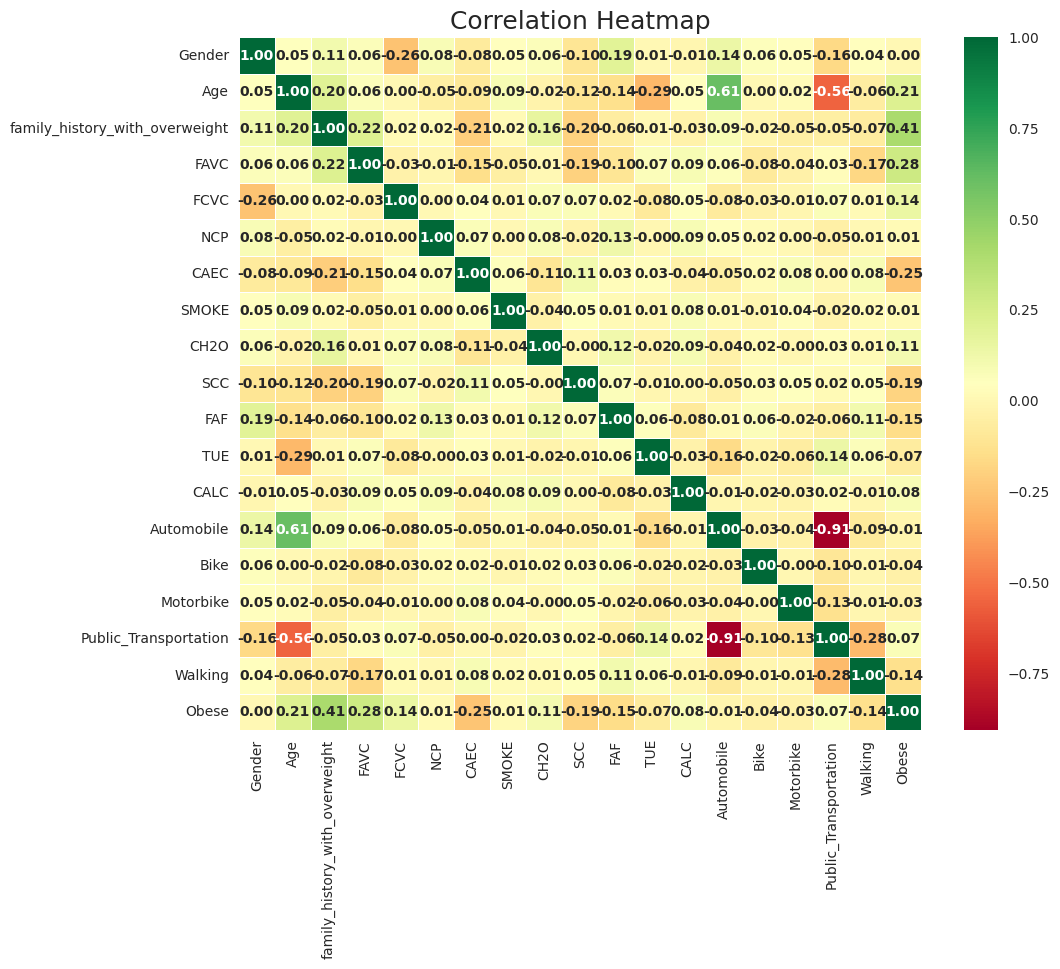

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(11, 9))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='RdYlGn',
            annot_kws={'size': 10, 'weight': 'bold'}, linecolor='white', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


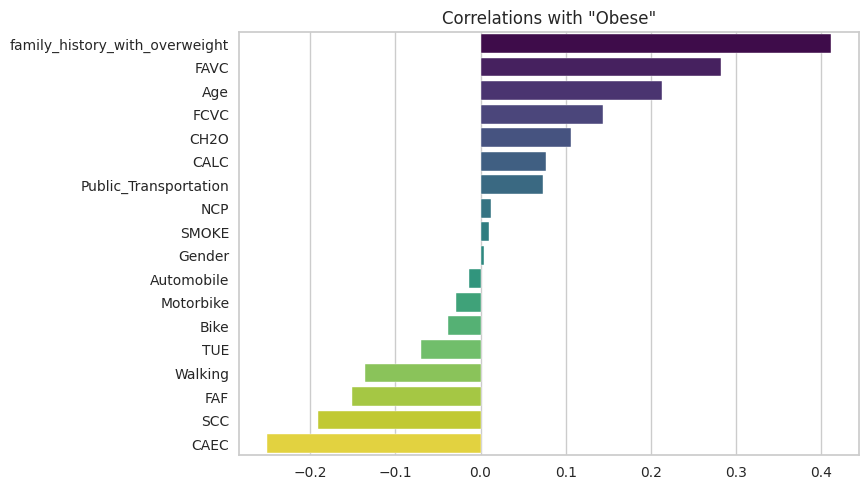

In [ ]:
limit = -1.0

data = df.corr()["Obese"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]] > limit:
        labels.append(indices[i])
        corr.append(data[i])

# Generate a unique color for each correlation value
colors = plt.cm.viridis(np.linspace(0, 1, len(corr)))

# Plotting
sns.barplot(x=corr, y=labels, palette=colors)
plt.title('Correlations with "Obese"')
plt.show()

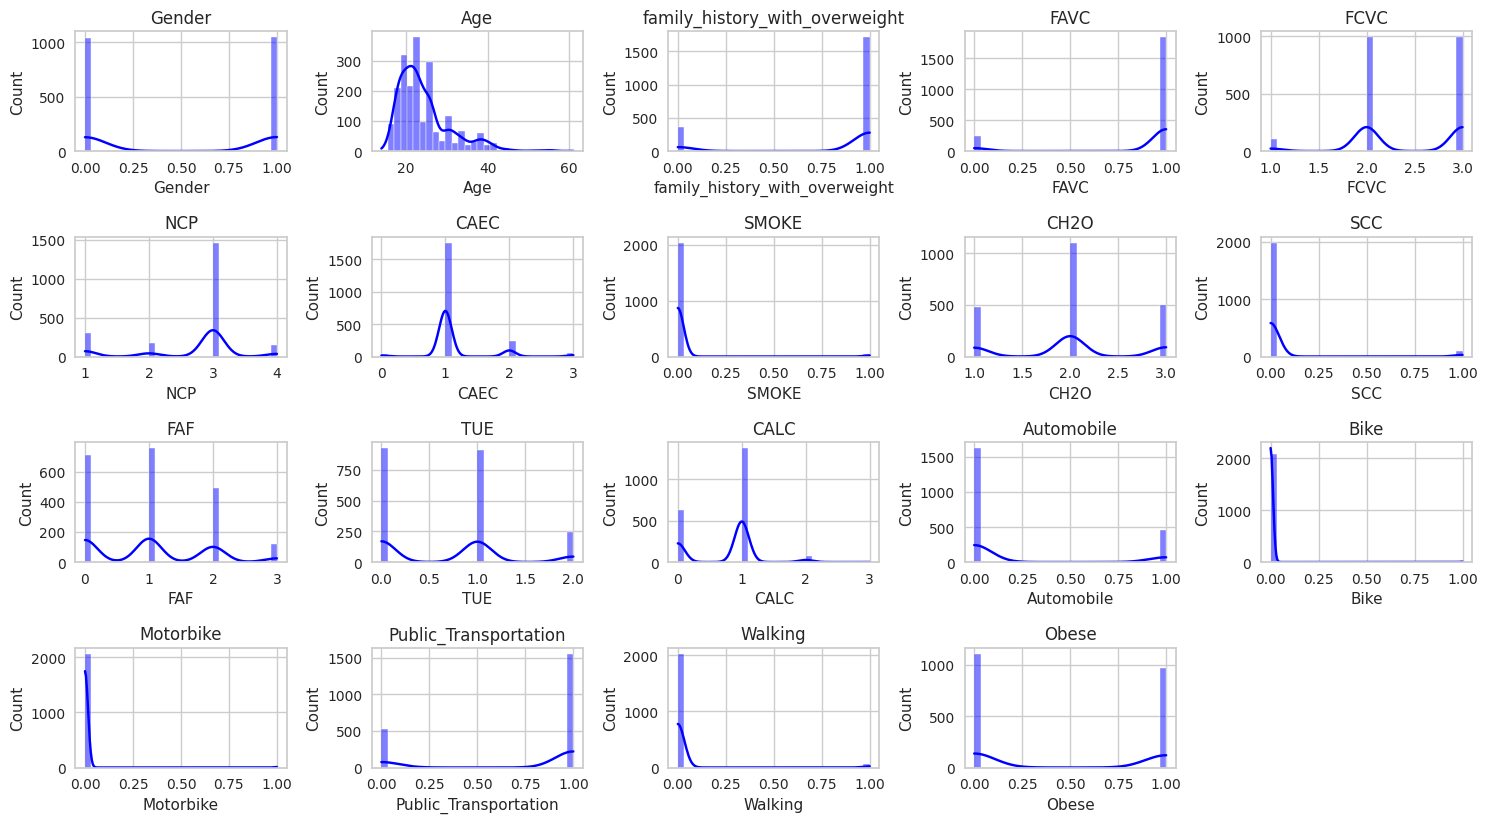

In [ ]:
plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.subplot(5, 5, df.columns.get_loc(column) + 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(column)
plt.tight_layout()
plt.show()

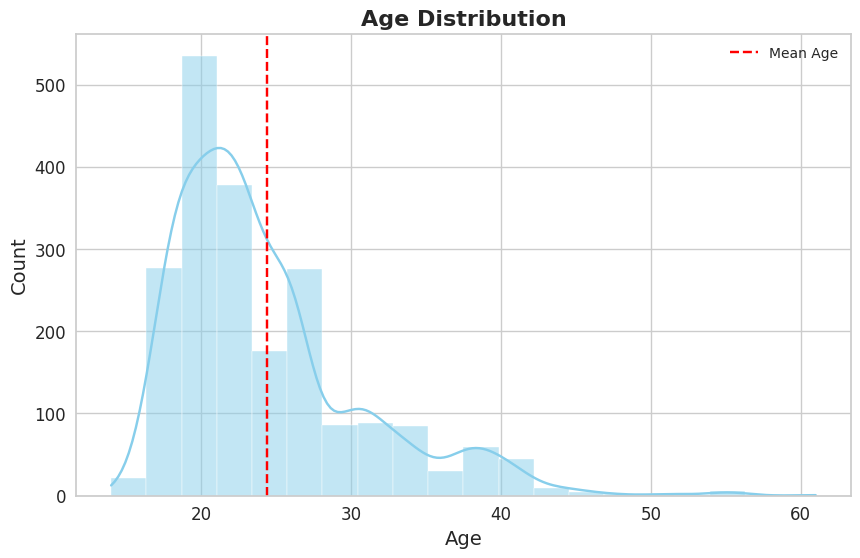

In [ ]:
# Visualize the age distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")

plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axvline(df['Age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.legend()
plt.show()

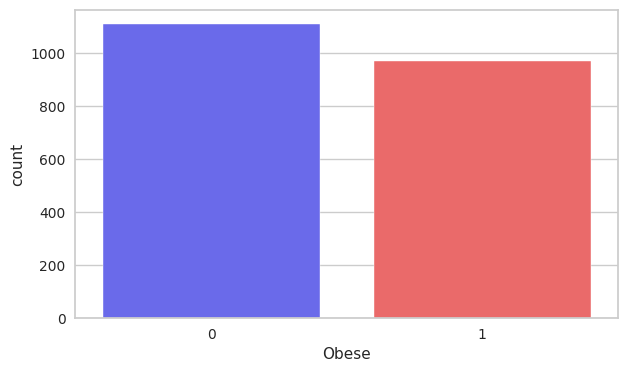

In [ ]:
# Countplot for Obese (Target Feature)
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(x=df["Obese"], palette="seismic")
plt.show()

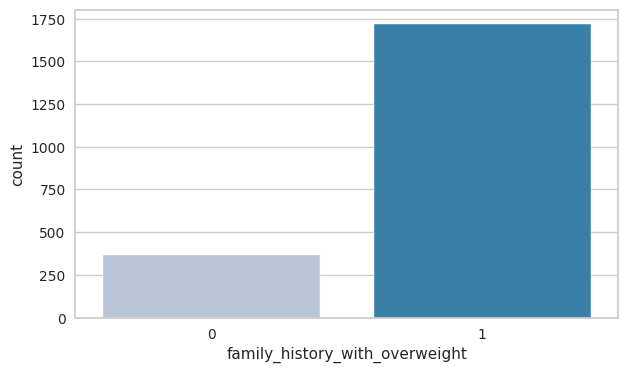

In [ ]:
# Countplot for family_history_with_overweight

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(x=df["family_history_with_overweight"], palette="PuBu")
plt.show()

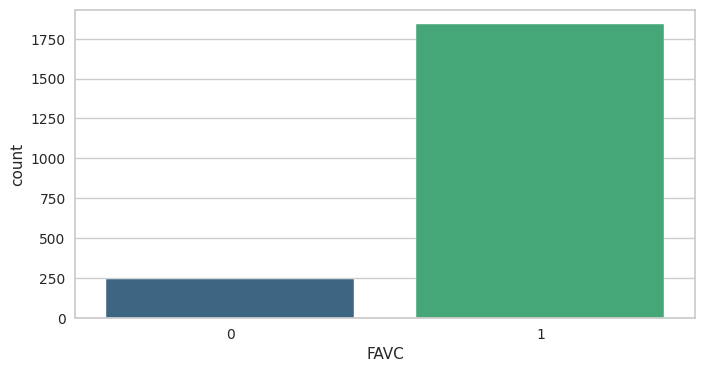

In [ ]:
# Countplot for FAVC (eats high caloric food frequently)

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["FAVC"], palette="viridis")
plt.show()

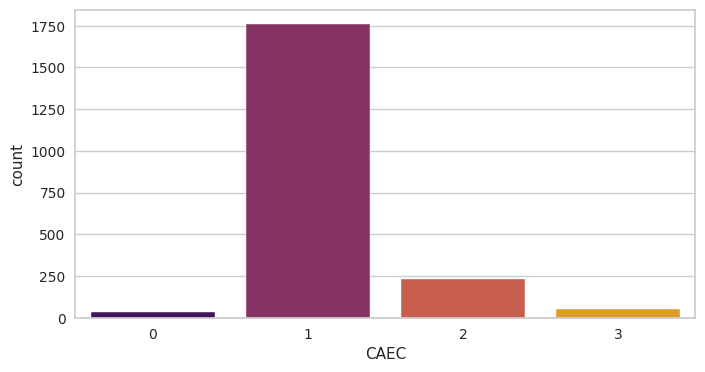

In [ ]:
# Countplot for CAEC (how much food a respondent eats between meals)

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["CAEC"], palette="inferno")
plt.show()

# Splitting the data sets

In [ ]:
# Set 'Obese' column as the target variable 'y'
X = df.drop(['Obese'], axis=1)
y = df['Obese']

## Split data into training (60%) and a temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

# Now, split the temporary set into validation and test sets equally (50% each of the temporary set, resulting in 20% each of the original dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Random Forests

In [ ]:
rfc1 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=140,max_depth=15, random_state=42)
rfc1.fit(X_train, y_train)
y_val_pred = rfc1.predict(X_val)
## Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Precision: {precision_score(y_val, y_val_pred)}')
print(f'Recall: {recall_score(y_val, y_val_pred)}')
print(f'F1-Score: {f1_score(y_val, y_val_pred)}')

cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       225
           1       0.91      0.92      0.91       191

    accuracy                           0.92       416
   macro avg       0.92      0.92      0.92       416
weighted avg       0.92      0.92      0.92       416

Accuracy: 0.9206730769230769
Precision: 0.9072164948453608
Recall: 0.9214659685863874
F1-Score: 0.9142857142857143
Confusion Matrix:
[[207  18]
 [ 15 176]]


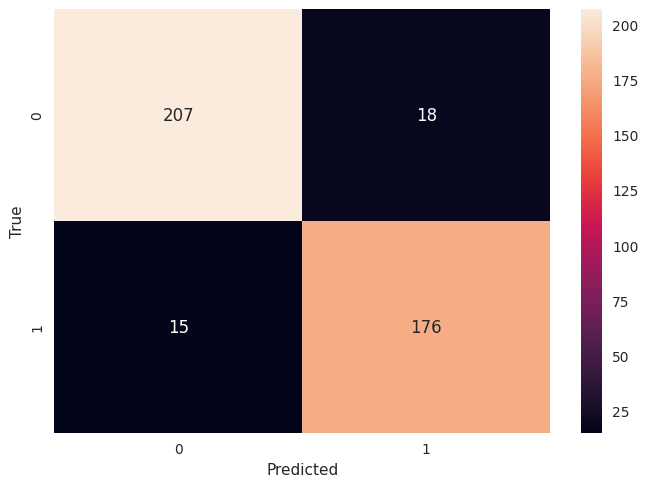

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=140,max_depth=15, random_state=42)
rfc2.fit(X_train, y_train)
y_val_pred2 = rfc2.predict(X_val)
## Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, y_val_pred2))
print(f'Accuracy: {accuracy_score(y_val, y_val_pred2)}')
print(f'Precision: {precision_score(y_val, y_val_pred2)}')
print(f'Recall: {recall_score(y_val, y_val_pred2)}')
print(f'F1-Score: {f1_score(y_val, y_val_pred2)}')

cm = confusion_matrix(y_val, y_val_pred2)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       225
           1       0.93      0.92      0.92       191

    accuracy                           0.93       416
   macro avg       0.93      0.93      0.93       416
weighted avg       0.93      0.93      0.93       416

Accuracy: 0.9302884615384616
Precision: 0.9263157894736842
Recall: 0.9214659685863874
F1-Score: 0.9238845144356956
Confusion Matrix:
[[211  14]
 [ 15 176]]


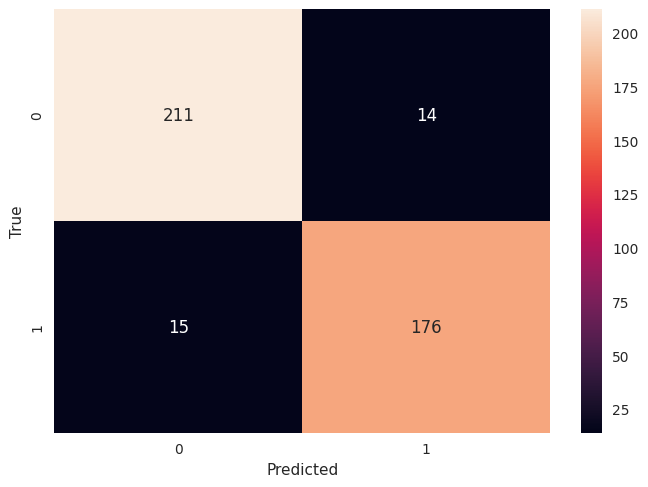

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred2)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

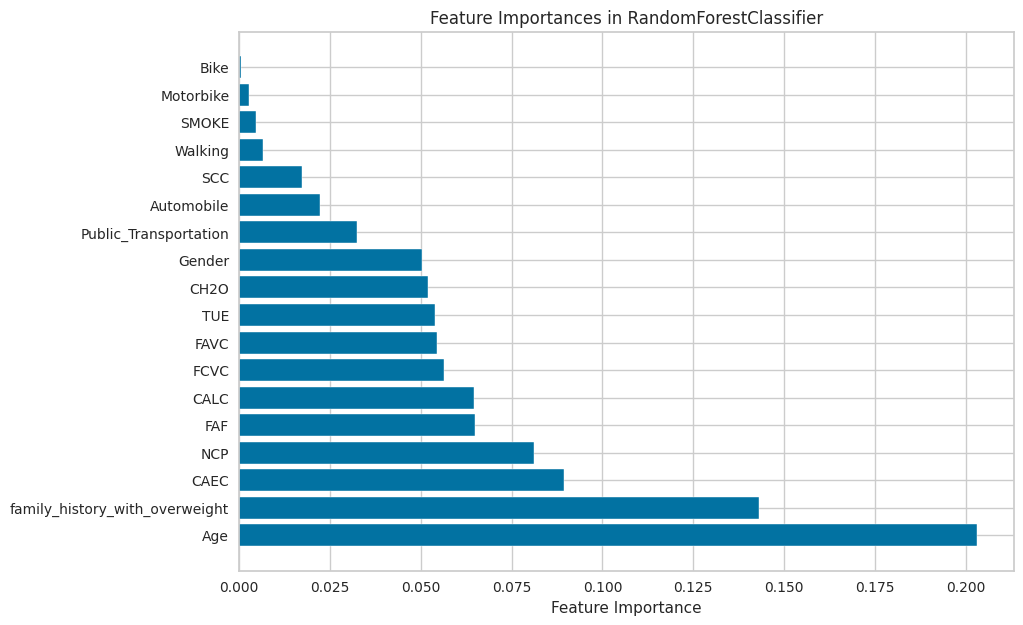

In [ ]:
# Feature Importances in Random Forest
feature_names = ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
feature_importances = rfc2.feature_importances_

features_sorted = sorted(zip(feature_importances, feature_names), reverse=True)
sorted_importances, sorted_feature_names = zip(*features_sorted)

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(sorted_importances)), sorted_importances)
ax.set_yticks(range(len(sorted_importances)))
ax.set_yticklabels(sorted_feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importance")
plt.show()


# Clustering with K-means



In [ ]:
df



,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,Obese
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21.0,1,1,3.0,3.0,1,0,2.0,0,2.0,1.0,1,0,0,0,1,0,1
2107,0,22.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,1
2108,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,1
2109,0,24.0,1,1,3.0,3.0,1,0,3.0,0,1.0,1.0,1,0,0,0,1,0,1


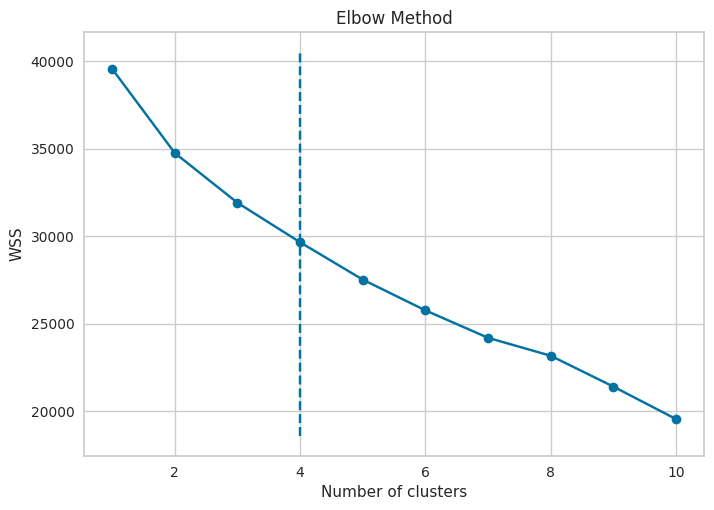

Optimal number of clusters: 4


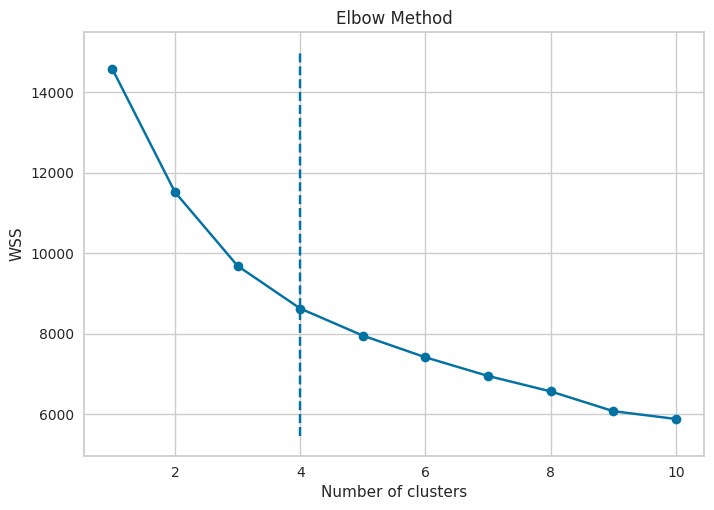

Optimal number of clusters: 4


In [ ]:
# Specified columns for the subset
columns = ["Age", "Gender", "CH2O", "CALC", "FCVC", "Age", "TUE"]
df_subset = df[columns]

scaler = StandardScaler()

# Scale the whole dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Scale the subset
df_subset_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

def plot_elbow_method_and_find_optimal_clusters(data, k_max=10):
    wss = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        wss.append(kmeans.inertia_)

    plt.plot(range(1, k_max + 1), wss, marker='o')
    plt.title("Elbow Method")
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.grid(True)

    # Use KneeLocator to find the elbow point
    knee_locator = KneeLocator(range(1, k_max + 1), wss, curve='convex', direction='decreasing')
    plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.show()

    print(f"Optimal number of clusters: {knee_locator.knee}")

# Plot for the whole scaled dataset and find the optimal number of clusters
plot_elbow_method_and_find_optimal_clusters(df_scaled)

# Plot for the scaled subset and find the optimal number of clusters
plot_elbow_method_and_find_optimal_clusters(df_subset_scaled)

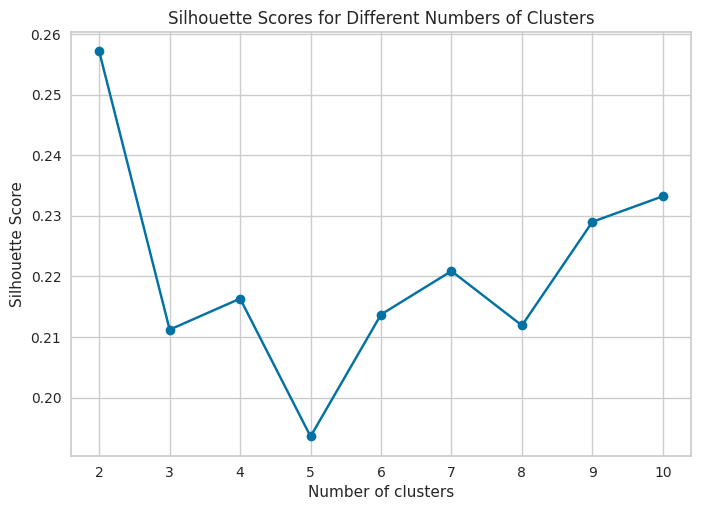

In [ ]:
# Silhouette Score Comparison

def plot_silhouette_scores(data, k_min=2, k_max=10):
    silhouette_scores = []
    for k in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(k_min, k_max + 1), silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Different Numbers of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Plot silhouette scores for the scaled subset
plot_silhouette_scores(df_subset_scaled, 2, 10)


For n_clusters = 2, The average silhouette_score is : 0.2571314876306346
For n_clusters = 3, The average silhouette_score is : 0.21121130390404838
For n_clusters = 4, The average silhouette_score is : 0.216243491441436
For n_clusters = 5, The average silhouette_score is : 0.1950548023026221


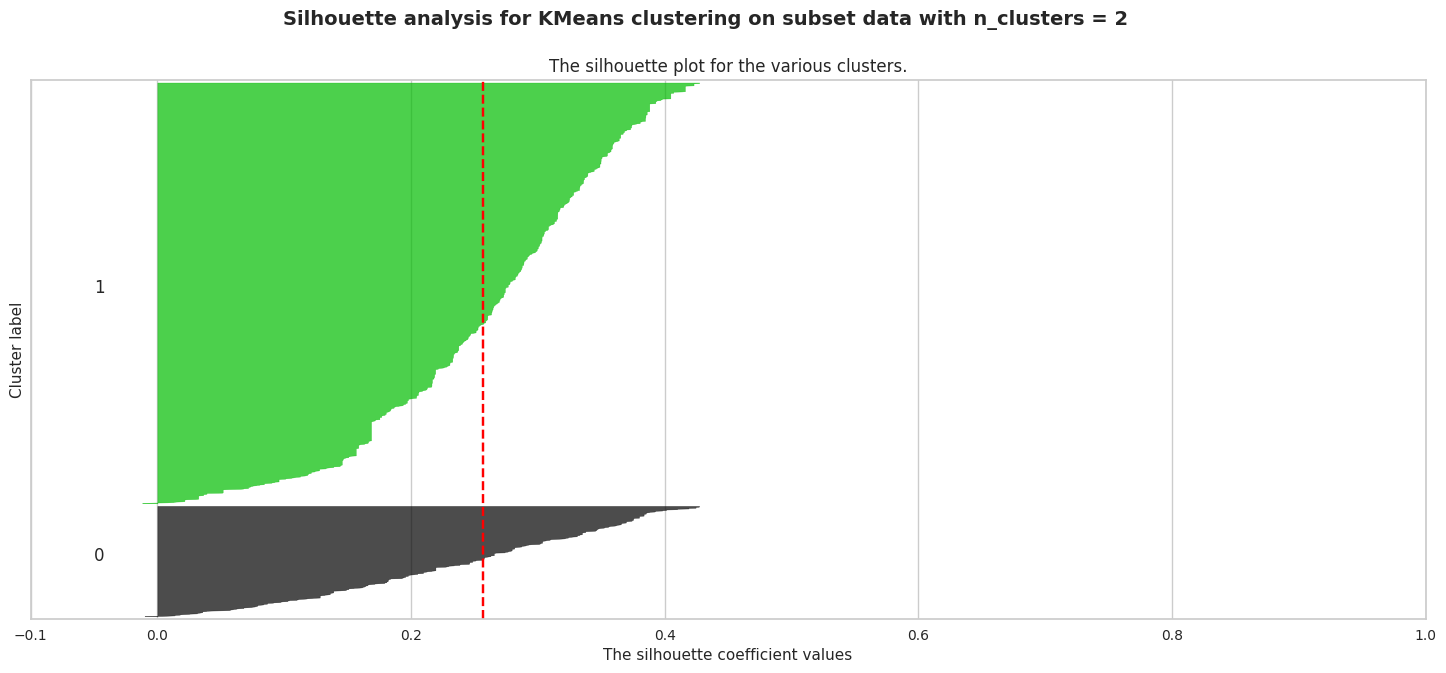

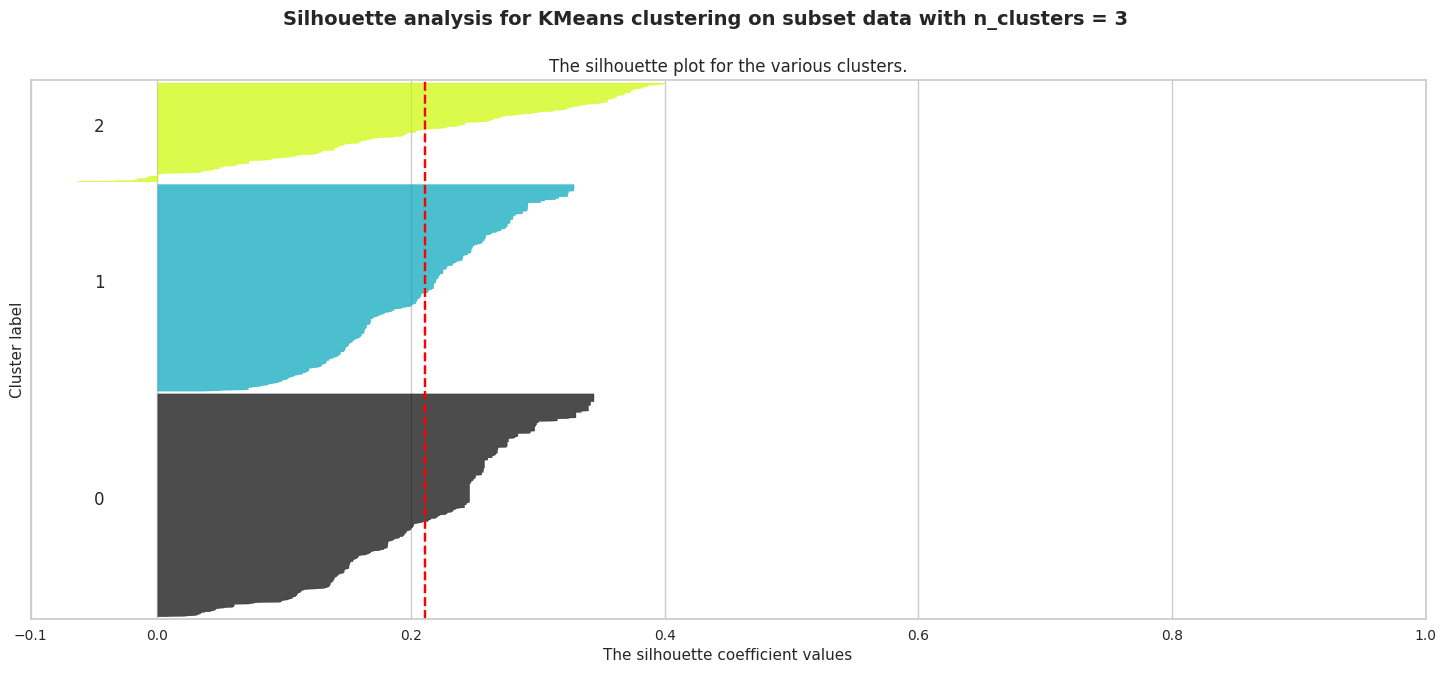

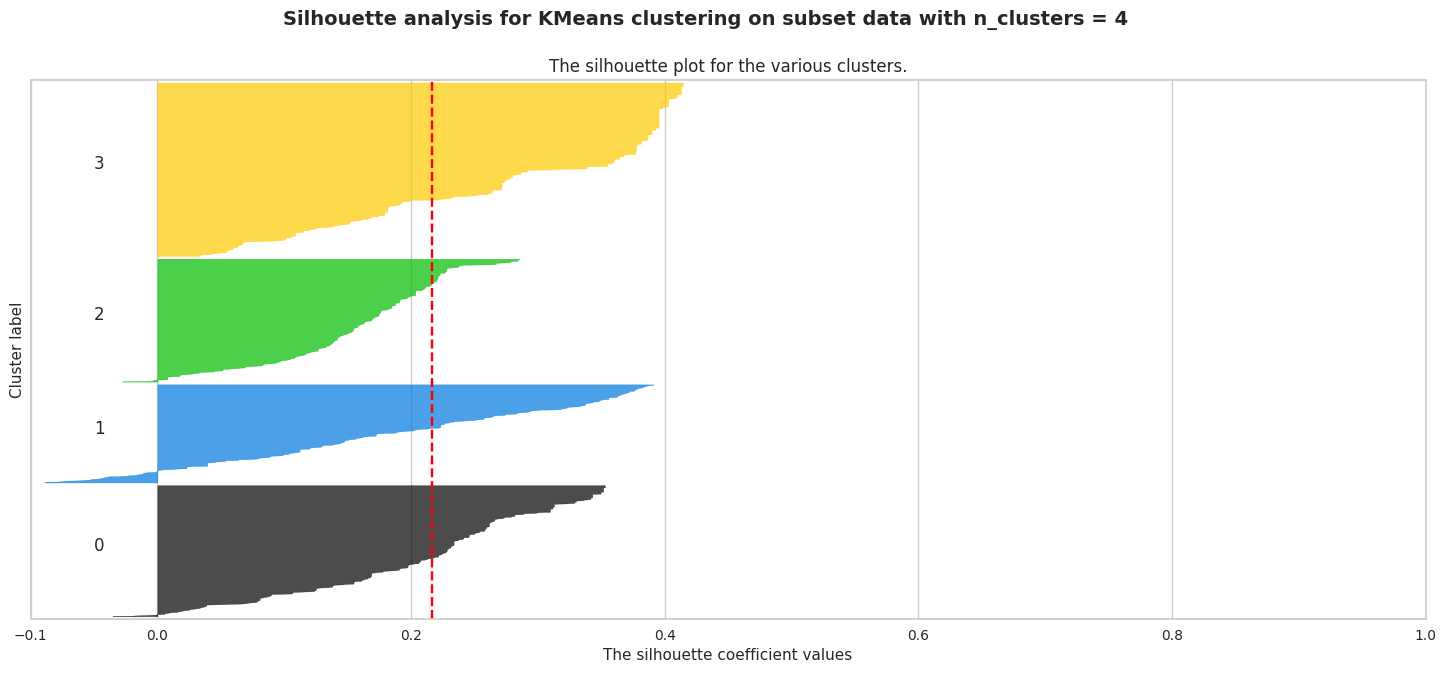

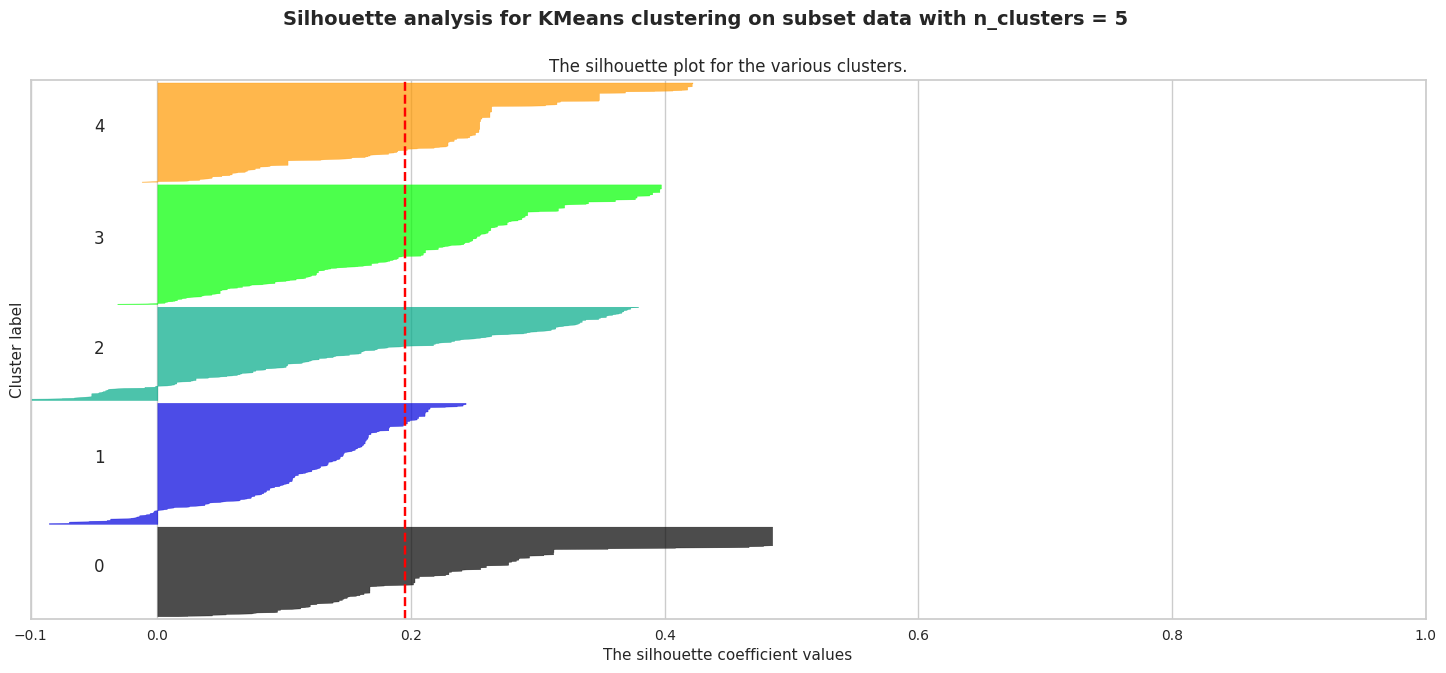

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

# Assuming df_subset_scaled is your scaled subset
range_n_clusters = [2, 3, 4, 5]  # Example cluster range; adjust as needed

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Set the silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # Inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(df_subset_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_subset_scaled)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(df_subset_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_subset_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate and sort silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle((f"Silhouette analysis for KMeans clustering on subset data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()


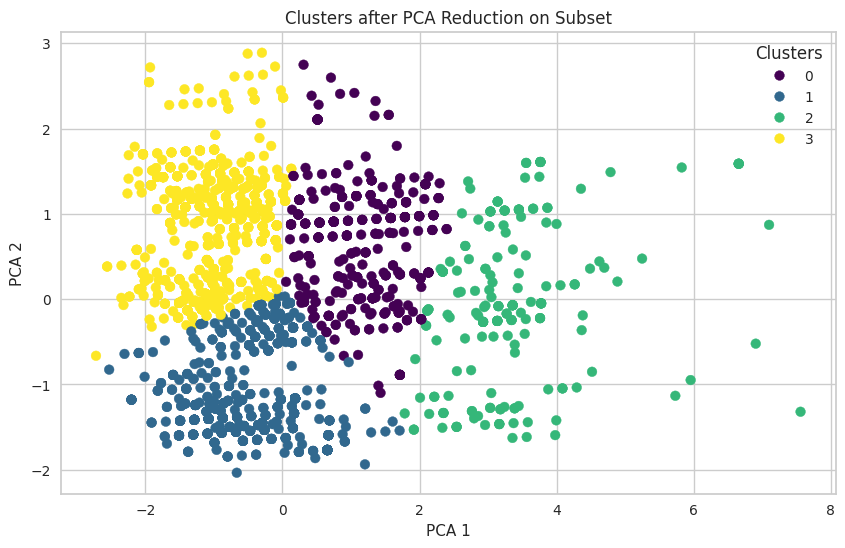

In [ ]:
# Assuming df_subset_scaled is already defined and scaled
pca = PCA(n_components=2)
df_subset_pca = pca.fit_transform(df_subset_scaled)

optimal_k = 4  # Replace with your optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=15)
clusters = kmeans.fit_predict(df_subset_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_subset_pca[:, 0], df_subset_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters after PCA Reduction on Subset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Adding legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()


In [ ]:
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(X):
    n, d = X.shape
    m = int(0.1 * n)  # m points for distance comparison (10% of dataset)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = shuffle(X, random_state=42)[:m]

    uj = 0.0
    wj = 0.0
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(rand_X[j].reshape(1, -1), 2, return_distance=True)
        uj += u_dist[0][1]
        w_dist, _ = nbrs.kneighbors(X[j].reshape(1, -1), 2, return_distance=True)
        wj += w_dist[0][1]

    H = uj / (uj + wj)
    return H

print(f"Hopkins statistic for the whole dataset: {hopkins_statistic(df_scaled.to_numpy())}")
print(f"Hopkins statistic for the subset: {hopkins_statistic(df_subset_scaled.to_numpy())}")


Hopkins statistic for the whole dataset: 0.2804785169634587
Hopkins statistic for the subset: 0.37478553808352516


In [ ]:
#The hopkins function is used to estimate the cluster tendency of a dataset.
#It is a measure of the distances between each data point and its nearest neighbor within the dataset to the distances between each data point and its nearest neighbor within a randomly generated dataset with the same marginal distributions as the original dataset.
#The Hopkins statistic ranges between 0 and 1, with values closer to 1 indicating a higher degree of clustering tendency in the dataset.